In [11]:
import sys
sys.path.append("../")

import networkx as nx
import numpy as np
import pickle
import time
import lzma


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

import os
os.chdir("../")

In [2]:
avg_project_returns = {0:[], 1:[], 2:[]}
start_t = time.time()

for seed_folder in os.listdir("DATA/nodebt/"):
    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    if "DS_" not in seed_folder:
        files = os.listdir(f"DATA/nodebt/{seed_folder}")
        for f in files:
            data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}")) 
            data_W = data["W"]
            prop_richer = sum(data_W[-1] > data_W[0]) / 1225
            assert 0 <= prop_richer <= 1
            if prop_richer == 0:
                regime = 0
            elif prop_richer < 1:
                regime = 1
            else:
                regime = 2
            mean_returns = np.mean(data["O"][:,:-1], axis=0)
            avg_project_returns[regime].append(mean_returns)

0.00 | new_model_runs_paper_14
548.18 | new_model_runs_paper_13
1092.05 | new_model_runs_paper_12
1636.26 | new_model_runs_paper_15
2178.75 | .DS_Store
2178.75 | new_model_runs_paper_0
2725.94 | new_model_runs_paper_7
3278.55 | new_model_runs_paper_9
3819.91 | new_model_runs_paper_8
4367.13 | new_model_runs_paper_6
4913.44 | new_model_runs_paper_1
5474.93 | new_model_runs_paper_19
6022.05 | new_model_runs_paper_10
6577.08 | new_model_runs_paper_17
7134.18 | new_model_runs_paper_16
7691.61 | new_model_runs_paper_11
8237.66 | new_model_runs_paper_18
8791.79 | new_model_runs_paper_4
9345.82 | new_model_runs_paper_3
9895.84 | new_model_runs_paper_2
10445.09 | new_model_runs_paper_5


In [3]:
for key in avg_project_returns:
    avg_project_returns[key] = np.concatenate(avg_project_returns[key])

In [4]:
with open("paper_average_project_returns.pickle", "wb") as f:
    pickle.dump(avg_project_returns, f)

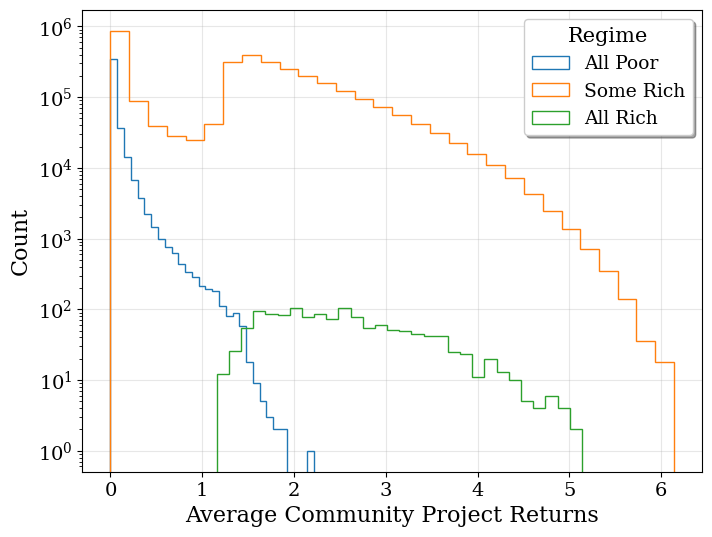

In [14]:
labels = ["All Poor", "Some Rich", "All Rich"]
for key in avg_project_returns:
    plt.hist(avg_project_returns[key], label=labels[key], histtype="step", bins=30)
    
plt.legend(title="Regime", shadow=True)
plt.yscale("log")
plt.xlabel("Average Community Project Returns")
plt.ylabel("Count")
plt.savefig("project_returns_distributions.pdf", bbox_inches="tight")
plt.show()